# Vlasov equation


\begin{equation} \left\{\begin{matrix}
\frac{\mathrm{d}\mathbf{x}_\epsilon}{\mathrm{d}t}&=& \mathbf{v}_\epsilon, & \hspace{1cm} \mathbf{x}_\epsilon(s) = \mathbf{x}\\
\frac{\mathrm{d}\mathbf{v}_\epsilon}{\mathrm{d}t} &=& \frac{1}{\epsilon}\left(\mathbf{v}_\epsilon\times \mathcal{M}(\mathbf{x}_\varepsilon)\right) +\mathbf{v}_\varepsilon \times \mathbf{e}_3,& \hspace{1cm}\mathbf{v}_\epsilon(s)=\mathbf{v}
\end{matrix}\right. 
\end{equation}
with $\displaystyle{\mathcal{M}(\mathbf{x})= \frac{1}{\sqrt{x_1^2+x_2^2}} \begin{pmatrix}-\mathbf{x}_2 \\ \mathbf{x}_1 \\ 0\end{pmatrix}}$


## Strong variable magnetic field

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import parareal as para
import HamiltonianFunctions as func
import RK4 as RK4
import RK2 as RK2
import StrongVariableMagneticField as SVMF
s = 0

N = 8
kmax = 20


T: 0.05
N: 8
delta_t: 0.00625
eps: 0.0001
kmax: 20
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
T: 0.2
N: 8
delta_t: 0.025
eps: 0.0004
kmax: 20
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
T: 0.5
N: 8
delta_t: 0.0625
eps: 0.001
kmax: 20
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
T: 2.0
N: 8
delta_t: 0.25
eps: 0.004
kmax: 20
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
T: 5.0
N: 8
delta_t: 0.625
eps: 0.01
kmax: 20
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
T: 20.0
N: 8
delta_t: 2.5
eps: 0.04
kmax: 20
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
T: 50.0
N: 8
delta_t: 6.25
eps: 0.1
kmax: 20
k: 1


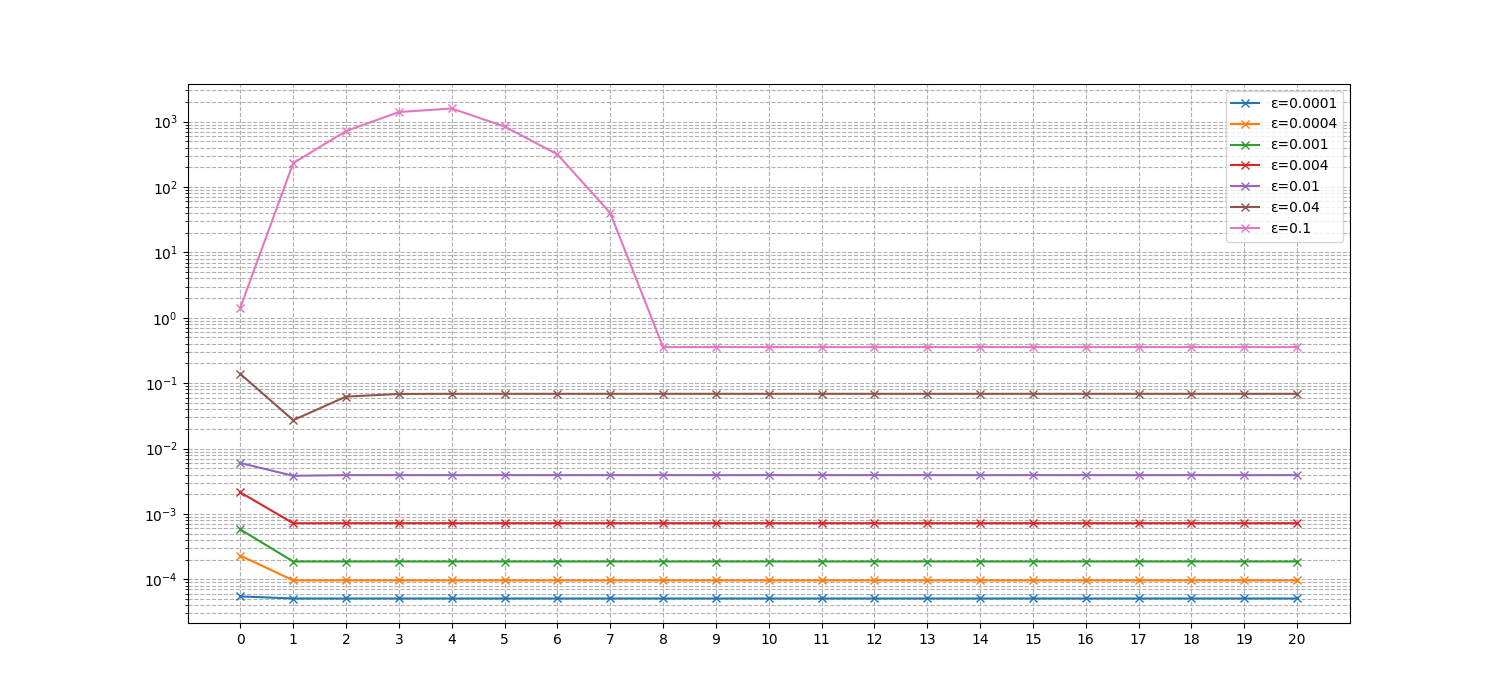

In [2]:
%matplotlib widget
fig4,ax4 = plt.subplots(1,figsize=(15,7))
for eps in [0.0001,0.0004,0.001,0.004,0.01,0.04,0.1]:
    x = np.longdouble([1,1,1])
    v = np.longdouble([1,eps,0])
    y0 = np.concatenate((x,v))
    T = 500*eps
    delta_t = T/N
    y_tab = SVMF.tab_RK4_magnetic(func.VariableMagneticField,s,T,y0,T/6400,eps)
    sol = SVMF.parareal_bis_magnetic(func.VariableMagneticField,SVMF.G4_final,SVMF.approx,y0,eps,T/6400,delta_t,T,kmax)
    normans = np.zeros(N+1)
    for n in range(N+1):
        normans[n] = np.linalg.norm(y_tab[:,(6400//N)*n],1)
    maxans = np.max(normans)
    err = np.zeros((kmax+1,N+1))
    Err= np.zeros(kmax+1)
    for k in range(kmax+1):
        for n in range(N+1):
            err[k,n]= np.linalg.norm(y_tab[:,n*(6400//N)] - sol[k+1,n,:],1)
        Err[k] = np.max(err[k])/maxans
    ax4.plot([k for k in range(kmax+1)],Err,'x-')
ax4.set_yscale('log')
ax4.set_xticks([i for i in range(21)])
ax4.grid(True, which="both", ls="dashed")
ax4.legend([f"\u03b5=0.0001",f"\u03b5=0.0004",f"\u03b5=0.001",f"\u03b5=0.004",f"\u03b5=0.01",f"\u03b5=0.04",f"\u03b5=0.1"])
fig4.savefig(f"RelativeErrorVariableMagneticN{N}.pdf")